In [1]:
# Source: https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

# Experiment 3

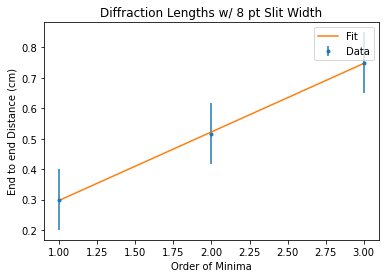

The slope = 0.225, with uncertainty 0.071
The intercept = 0.072, with uncertainty 0.153
Reduced chi^2 = 0.005


In [4]:
# Slit Width 8 pts
m = np.array([1,2,3])
distance = np.array([np.mean([0.3, 0.3, 0.3]), np.mean([0.5, 0.55, 0.5]), np.mean([0.75, 0.75, 0.75])])  # cm

# standard error
yerr = np.array([np.std([0.3, 0.3, 0.3]), np.std([0.5, 0.55, 0.5]), np.std([0.75, 0.75, 0.75])]) / np.sqrt(3)
yerr = np.sqrt(yerr**2 + 0.1**2)  # measurement uncertainty propagation
plt.errorbar(m, distance, yerr=yerr, fmt='.',label='Data')
plt.xlabel('Order of Minima')
plt.ylabel('End to end Distance (cm)')
plt.title('Diffraction Lengths w/ 8 pt Slit Width')

a_fit,cov=curve_fit(linearFunc,m,distance,sigma=yerr,absolute_sigma=True)
inter = a_fit[0]
slope8 = a_fit[1]
yfit = inter + slope8*m
plt.plot(m,yfit,label='Fit')
d_inter = np.sqrt(cov[0][0])
d_slope8 = np.sqrt(cov[1][1])
plt.legend()
plt.show()

print(f'The slope = {np.round(slope8, 3)}, with uncertainty {np.round(d_slope8, 3)}')
print(f'The intercept = {np.round(inter, 3)}, with uncertainty {np.round(d_inter, 3)}')

chisqr = sum((distance-linearFunc(m,inter,slope8))**2/yerr**2)
dof = len(distance) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {np.round(chisqr_red, 3)}')

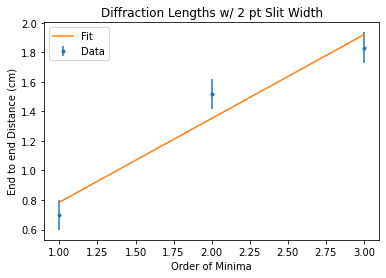

The slope = 0.567, with uncertainty 0.073
The intercept = 0.218, with uncertainty 0.157
Reduced chi^2 = 4.03


In [5]:
# Slit Width 2 pts
m = np.array([1,2,3])
distance = np.array([np.mean([0.75, 0.7, 0.65]), np.mean([1.5, 1.55, 1.5]), np.mean([1.9, 1.8, 1.8])])  # cm

# standard error
yerr = np.array([np.std([0.75, 0.7, 0.65]), np.std([1.5, 1.55, 1.5]), np.std([1.9, 1.8, 1.8])]) / np.sqrt(3)
yerr = np.sqrt(yerr**2 + 0.1**2)  # measurement uncertainty propagation
plt.errorbar(m, distance, yerr=yerr, fmt='.',label='Data')
plt.xlabel('Order of Minima')
plt.ylabel('End to end Distance (cm)')
plt.title('Diffraction Lengths w/ 2 pt Slit Width')

a_fit,cov=curve_fit(linearFunc,m,distance,sigma=yerr,absolute_sigma=True)
inter = a_fit[0]
slope2 = a_fit[1]
yfit = inter + slope2*m
plt.plot(m,yfit,label='Fit')
d_inter = np.sqrt(cov[0][0])
d_slope2 = np.sqrt(cov[1][1])
plt.legend()
plt.show()

print(f'The slope = {np.round(slope2, 3)}, with uncertainty {np.round(d_slope2, 3)}')
print(f'The intercept = {np.round(inter, 3)}, with uncertainty {np.round(d_inter, 3)}')

chisqr = sum((distance-linearFunc(m,inter,slope2))**2/yerr**2)
dof = len(distance) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {np.round(chisqr_red, 3)}')

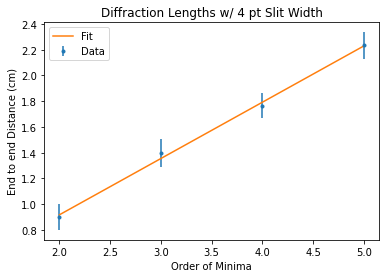

The slope = 0.437, with uncertainty 0.045
The intercept = 0.043, with uncertainty 0.167
Reduced chi^2 = 0.136


In [6]:
# Slit Width 4 pts
m = np.array([2,3,4,5])
distance = np.array([np.mean([0.9,0.9,0.9]), np.mean([1.3,1.4,1.5]), np.mean([1.8,1.75,1.75]),np.mean([2.3,2.2,2.2])])  # cm

# standard error
yerr = np.array([np.std([0.9,0.9,0.9]), np.std([1.3,1.4,1.5]), np.std([1.8,1.75,1.75]), np.std([2.3,2.2,2.2])]) / np.sqrt(4)
yerr = np.sqrt(yerr**2 + 0.1**2)  # measurement uncertainty propagation
plt.errorbar(m, distance, yerr=yerr, fmt='.',label='Data')
plt.xlabel('Order of Minima')
plt.ylabel('End to end Distance (cm)')
plt.title('Diffraction Lengths w/ 4 pt Slit Width')

a_fit,cov=curve_fit(linearFunc,m,distance,sigma=yerr,absolute_sigma=True)
inter = a_fit[0]
slope4 = a_fit[1]
yfit = inter + slope4*m
plt.plot(m,yfit,label='Fit')
d_inter = np.sqrt(cov[0][0])
d_slope4 = np.sqrt(cov[1][1])
plt.legend()
plt.show()

print(f'The slope = {np.round(slope4, 3)}, with uncertainty {np.round(d_slope4, 3)}')
print(f'The intercept = {np.round(inter, 3)}, with uncertainty {np.round(d_inter, 3)}')

chisqr = sum((distance-linearFunc(m,inter,slope4))**2/yerr**2)
dof = len(distance) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {np.round(chisqr_red, 3)}')






## Single slit interference
distance between minima = $2Lm\lambda/a$

slope = $2L\lambda/a = 2(70.9 \text{ cm})(634.6 \text{ nm})/a$

$a = 2*(70.9*10)(634.6/10^6)/\text{slope} = 0.9/(\text{slope}*10)$ mm

In [11]:
point_length = 0.04393

#error propagation
error2 = 0.9*(1/(slope2*10)**2)*(d_slope2*10)
error4 = 0.9*(1/(slope4*10)**2)*(d_slope4*10)
error8 = 0.9*(1/(slope8*10)**2)*(d_slope8*10)

print(f'2 point slit: a = {np.round(0.9/(slope2*10),3)} +/- {np.round(error2,3)} (experimental), a = {point_length*2} (theoretical)')
print(f'4 point slit: a = {np.round(0.9/(slope4*10),3)} +/- {np.round(error4,3)} (experimental), a = {point_length*4} (theoretical)')
print(f'8 point slit: a = {np.round(0.9/(slope8*10),3)} +/- {np.round(error8,3)}(experimental), a = {point_length*8} (theoretical)')

2 point slit: a = 0.159 +/- 0.02 (experimental), a = 0.08786 (theoretical)
4 point slit: a = 0.206 +/- 0.021 (experimental), a = 0.17572 (theoretical)
8 point slit: a = 0.4 +/- 0.126(experimental), a = 0.35144 (theoretical)
